In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Veri yükleme

In [2]:
df = pd.read_csv("maaslar.csv")

### Data Dilimleme - Slicing

In [3]:
X= df.drop(["maas","unvan"],axis=1).values
Y= df["maas"].values


# Linear Regression

In [4]:
linear_model = LinearRegression()

In [5]:
linear_model.fit(X,Y)

LinearRegression()

In [6]:
linear_model.predict(X)

array([-5722.72727273, -1678.78787879,  2365.15151515,  6409.09090909,
       10453.03030303, 14496.96969697, 18540.90909091, 22584.84848485,
       26628.78787879, 30672.72727273])

In [7]:
Y

array([ 2250,  2500,  3000,  4000,  5500,  7500, 10000, 15000, 25000,
       50000], dtype=int64)

In [8]:
linear_model.score(X,Y)

0.6690412331929894

<Axes: xlabel='Egitim Seviyesi', ylabel='maas'>

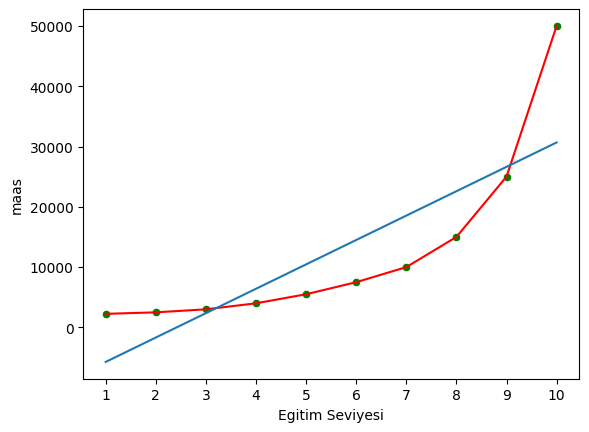

In [9]:
sns.lineplot(x=df["Egitim Seviyesi"],y=df["maas"],color="red")
sns.lineplot(x=df["Egitim Seviyesi"],y=linear_model.predict(X))
plt.xticks(np.arange(0,11))
sns.scatterplot(x=df["Egitim Seviyesi"],y=df["maas"],color="green")

# Polynomial Regresion

In [10]:
poly_reg = PolynomialFeatures(degree=10)
x_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,Y)

LinearRegression()

In [11]:
lin_reg2.predict(x_poly)

array([ 2249.99999466,  2499.99999728,  2999.9999757 ,  3999.99998333,
        5499.99998624,  7499.99998571,  9999.99998756, 15000.00000762,
       25000.00003674, 50000.00004502])

In [12]:
lin_reg2.score(x_poly,Y)

1.0

<Axes: xlabel='Egitim Seviyesi', ylabel='maas'>

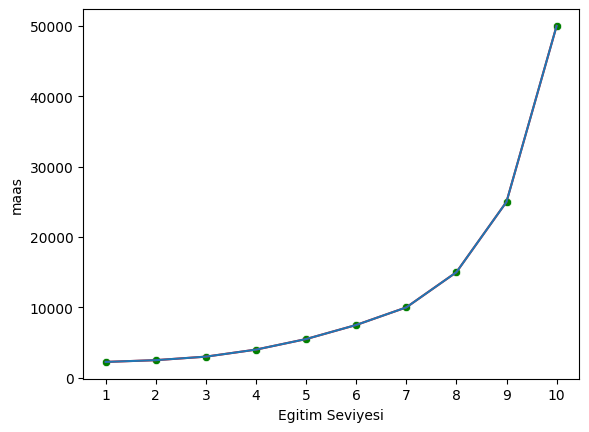

In [13]:
sns.lineplot(x=df["Egitim Seviyesi"],y=df["maas"],color="red")
sns.lineplot(x=df["Egitim Seviyesi"],y=lin_reg2.predict(poly_reg.fit_transform(X)))
plt.xticks(np.arange(0,11))
sns.scatterplot(x=df["Egitim Seviyesi"],y=df["maas"],color="green")


In [14]:
lin_reg2.predict(poly_reg.fit_transform([[11]]))

array([209510.41939704])

In [15]:
linear_model.predict([[11]])

array([34716.66666667])

In [17]:
r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X)))

1.0